#  MULTIPLE LINEAR REGRESSION

The assumptions that are made in multiple linear regression model are as follows:
1. The regression model is linear in regression parameters (beta-values).
2. The residuals follow a normal distribution and the expected value (mean) of the residuals is zero.
3. In time series data, residuals are assumed to uncorrelated.
4. The variance of the residuals is constant for all values of Xi. When the variance of the residuals is constant for different values of Xi, it is called homoscedasticity. A non-constant variance of residuals is called heteroscedasticity.
5. There is no high correlation between independent variables in the model (called multi-collinearity). Multi-collinearity can destabilize the model and can result in an incorrect estimation of the regression parameters.

## Predicting the SOLD PRICE (Auction Price) of Players

In [227]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

In [228]:
df = pd.read_csv(r"F:\Datasets\Machine Learning (Codes and Data Files)\Data\IPL IMB381IPL2013.csv")

In [229]:
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


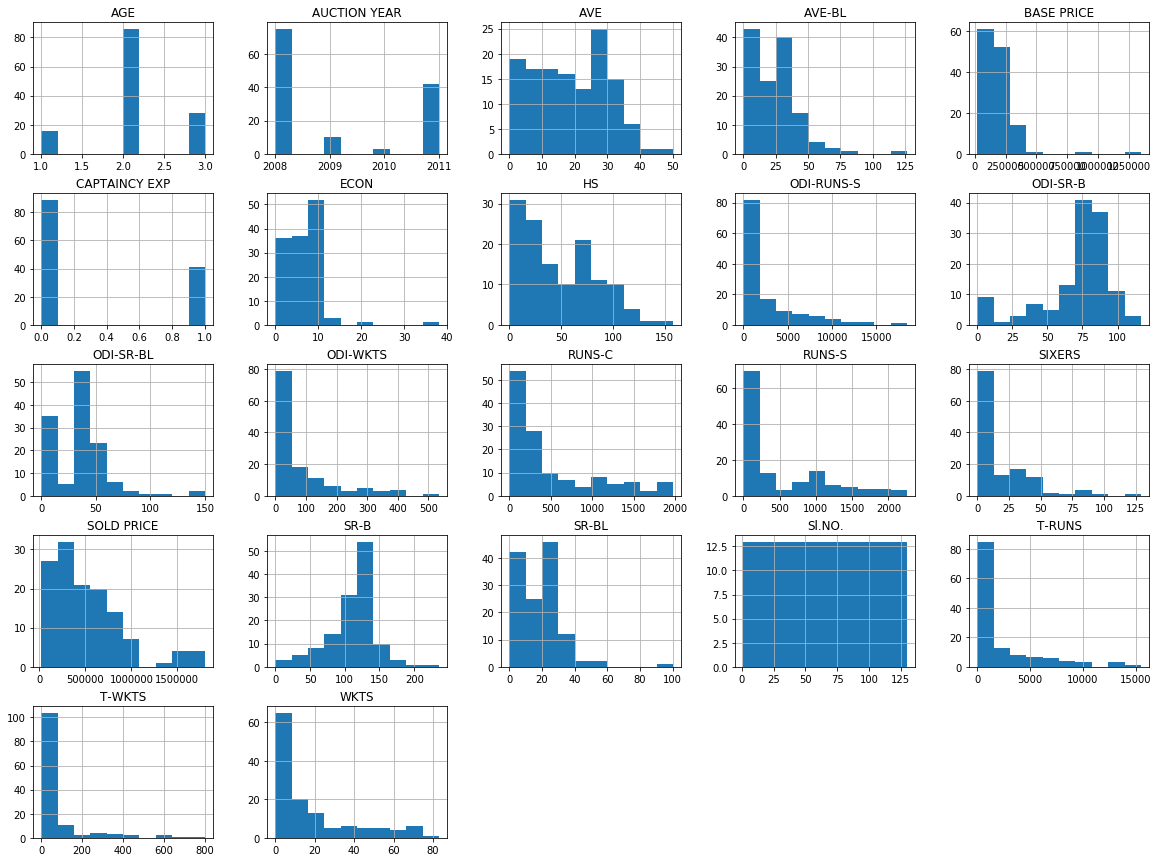

In [230]:
df.hist(figsize = (20,15))
plt.show()

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [232]:
len(df)

130

There are 130 observations (records) and 26 columns (features) in the data, and there are no missing 
values.

In [233]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

Most of the features in the dataset are numerical (ratio scale) whereas features such as AGE, COUNTRY, 
PLAYING ROLE, CAPTAINCY EXP are categorical and hence need to be encoded before building the 
model. Categorical variables cannot be directly included in the regression model, and they must be 
encoded using dummy variables before incorporating in the model building.

### Data Preparation

In [234]:
ipl_auction_df = df.drop(['Sl.NO.', 'PLAYER NAME', 'TEAM', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'], axis=1)

#### Encoding Categorical Features

AGE, COUNTRY, PLAYING ROLE, CAPTAINCY EXP are categorical

In [235]:
ipl_auction_df["PLAYING ROLE"].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [236]:
X_features = ipl_auction_df.columns

In [237]:
X_features


Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S',
       'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS',
       'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL'],
      dtype='object')

In [238]:
pd.get_dummies(ipl_auction_df["PLAYING ROLE"])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


As shown in the table above, the pd.get_dummies() method has created four dummy variables and has 
already set the variables to 1 as variable value in each sample.

Whenever we have n levels (or categories) for a qualitative variable (categorical variable), we will use 
(n − 1) dummy variables, where each dummy variable is a binary variable used for representing whether 
an observation belongs to a category or not. The reason why we create only (n − 1) dummy variables 
is that inclusion of dummy variables for all categories and the constant in the regression equation will 
create perfect multi-collinearity (will be discussed later). To drop one category, the parameter drop_ first 
should be set to True.
We must create dummy variables for all categorical (qualitative) variables present in the dataset.

In [239]:
categorical_features = ["AGE", "COUNTRY", "PLAYING ROLE", "CAPTAINCY EXP"]
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns = categorical_features, drop_first = True)

In [240]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [241]:
X_features = ipl_auction_encoded_df.columns

In [242]:
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

### Splitting the Dataset into Train and Validation Sets

In [243]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = sm.add_constant( ipl_auction_encoded_df ) 
Y = df["SOLD PRICE"]



train_X, test_X , train_y, test_y =train_test_split(X, Y, train_size = 0.8 , random_state = 42)

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Building the Model on the Training Dataset

In [244]:

ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2021-07-09 04:36        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

MLR model output from Python is provided in Table above. As per the p-value (<0.05), only the features 
HS, AGE_2, AVE and COUNTRY_ENG have come out significant. The model says that none of the other 
features are influencing SOLD PRICE (at a significance value of 0.05). This is not very intuitive and could 
be a result of multi-collinearity effect of variables.

### Multi-Collinearity and Handling Multi-Collinearity

When the dataset has a large number of independent variables (features), it is possible that few of these 
independent variables (features) may be highly correlated. The existence of a high correlation between 
independent variables is called multi-collinearity. Presence of multi-collinearity can destabilize the multiple linear regression model. Thus, it is necessary to identify the presence of multi-collinearity and 
take corrective actions.

Multi-collinearity can have the following impact on the model:
1. The standard error of estimate, Se ( ) b , is inflated. 
2. A statistically significant explanatory variable may be labelled as statistically insignificant due to 
the large p-value. This is because when the standard error of estimate is inflated, it results in an 
underestimation of t-statistic value. 
3. The sign of the regression coefficient may be different, that is, instead of negative value for regression coefficient, we may have a positive regression coefficient and vice versa.
4. Adding/removing a variable or even an observation may result in large variation in regression 
coefficient estimates.

#### 1)  Variance Inflation Factor (VIF)

In [245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors( X ): 
    X_matrix = X.as_matrix()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range ( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame() 
    vif_factors["column"] = X.columns 
    vif_factors["VIF"] = vif
    return vif_factors

In [246]:
vif_factors = get_vif_factors( X[X_features] ) 
vif_factors

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


#### 2) Checking Correlation of Columns with Large VIFs

We can generate a correlation heatmap to understand the correlation between the independent variables 
which can be used to decide which features to include in the model. We will first select the features that 
have VIF value of more than 4.

In [247]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

In [248]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

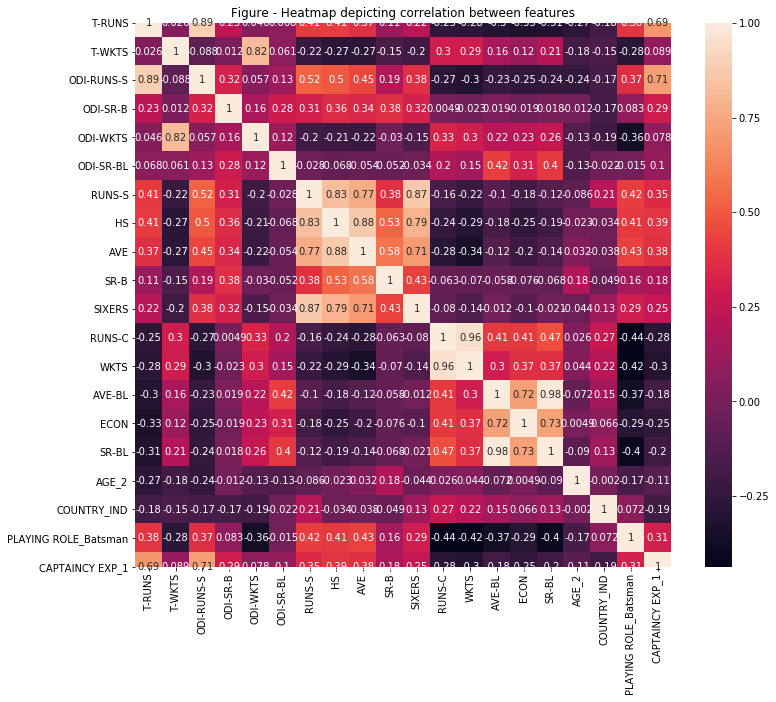

In [249]:
import seaborn as sn
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True )
plt.title("Figure - Heatmap depicting correlation between features")
plt.show()

The following observations are made from the heatmap:
1. T-RUNS and ODI-RUNS-S are highly correlated, whereas ODI-WKTS and T-WKTS are highly correlated.
2. Batsman features like RUNS-S, HS, AVE, SIXERS are highly correlated, while bowler’s features like AVE-BL, ECON and SR-BL are highly correlated.

To avoid multi-collinearity, we can keep only one column from each group of highly correlated variables and remove the others. Now which one to keep and which one to remove depends on the understanding of the data and the domain.


We have decided to remove the following features. Please note that it may take multiple iterations before deciding at a final set of variables, which do not have multi-collinearity. These iterations have been omitted here for simplicity.


In [250]:
columns_to_be_removed = ["T-RUNS", "T-WKTS", "RUNS-S", "HS", "AVE", 
"RUNS-C", "SR-B", "AVE-BL", "ECON", 
"ODI-SR-B", "ODI-RUNS-S", "AGE_2", "SR-BL" ]
X_new_features = list( set(X_features) - set(columns_to_be_removed))
get_vif_factors( X[X_new_features] )

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,column,VIF
0,COUNTRY_SA,1.416657
1,ODI-SR-BL,2.822148
2,COUNTRY_IND,3.144668
3,AGE_3,1.779861
4,WKTS,2.883101
5,COUNTRY_WI,1.194093
6,COUNTRY_SL,1.519752
7,COUNTRY_NZ,1.173418
8,COUNTRY_BAN,1.094293
9,COUNTRY_ZIM,1.205305


The VIFs on the final set of variables indicate that there is no multi-collinearity present any more 
(VIF values are less than 4). We can proceed to build the model with these set of variables now.

##  Building a New Model after Removing Multi-collinearity

In [251]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2021-07-09 04:37   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

the p-values of the coefficients estimated show whether the variables are statistically significant in influencing response variables or not. If the p-value is less than the significance value (a) then the 
feature is statistically significant, otherwise it is not. The value of a is usually selected as 0.05; however, it 
may be chosen based on the context of the problem.
Based on the p-values, only the variables COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCY 
EXP_1 have come out statistically significant. So, the features that decide the SOLD PRICE are
1. Whether the players belong to India or England (that is, origin country of the player).
2. How many sixes has the player hit in previous versions of the IPL? How many wickets have been
taken by the player in ODIs?
3. Whether the player has any previous captaincy experience or not.

Let us create a new list called significant_vars to store the column names of significant variables and build 
a new model.


In [252]:
significant_vars = ["COUNTRY_IND", "COUNTRY_ENG", "SIXERS", "CAPTAINCY EXP_1"]
train_X = train_X[significant_vars]
ipl_model_3 = sm.OLS(train_y, train_X).fit() 
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2021-07-09 04:37 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

The following inference can be derived from the latest model ipl_model_3 
1. All the variables are statistically significant, as p-value is less than 0.05%.
2. The overall model is significant as the p-value for the F-statistics is also less than 0.05%.
3. The model can explain 71.5% of the variance in SOLD PRICE as the R-squared value is 0.715 and 
the adjusted R-squared value is 0.704%. Adjusted R-squared is a measure that is calculated after 
normalizing SSE and SST with the corresponding degrees of freedom.

##  Residual Analysis in Multiple Linear Regression

### 1)  Test for Normality of Residuals (P-P Plot)

In [253]:
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid ); 
    plt.figure( figsize = (8, 6) ); 
    probplot.ppplot( line="45" ); 
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

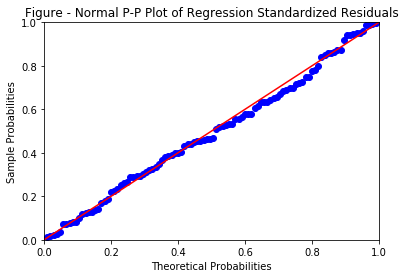

In [254]:
draw_pp_plot(ipl_model_3, "Figure - Normal P-P Plot of Regression Standardized Residuals")

The P-P plot in Figure 4.6 shows that the residuals follow an approximate normal distribution

### 2) Residual Plot for Homoscedasticity and Model Specification

In [255]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [256]:
def plot_resid_fitted(fitted, resid, title): 
    plt.scatter( get_standardized_values( fitted ),get_standardized_values( resid ) ) 
    plt.title(title)
    plt.xlabel("Standardized predicted values") 
    plt.ylabel("Standardized residual values") 
    plt.show()

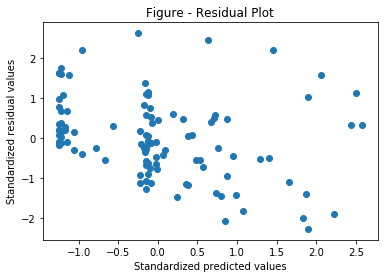

In [257]:
plot_resid_fitted(ipl_model_3.fittedvalues, ipl_model_3.resid, "Figure - Residual Plot")

The residuals in Figure do not show any signs of heteroscedasticity (no funnel-like pattern).

### 4)  Detecting Influencers

In OLS estimate, we assume that each record in the data has equal influence on the model parameters
(regression coefficients), which may not be true. We can use the function influence_plot() as explained in
the previous example to identify highly influential observations. Leverage values of more than 3 (k + 1) / n
are treated as highly influential observations. 

In [258]:
k = train_X.shape[1] 
n = train_X.shape[0]

In [259]:
print("Number of variables:", k, " and number of observations:", n)

Number of variables: 4  and number of observations: 104


In [260]:
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value:", round(leverage_cutoff, 3) )

Cutoff for leverage value: 0.144


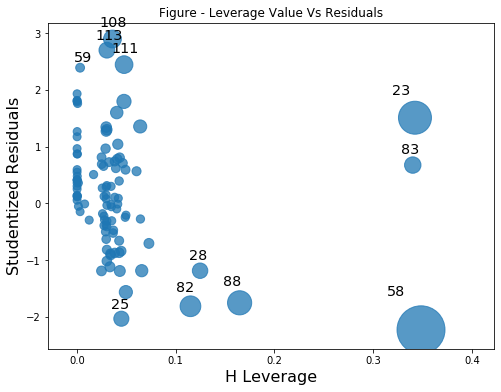

In [261]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) ) 
influence_plot(ipl_model_3, ax = ax )
plt.title( "Figure - Leverage Value Vs Residuals" ) 
plt.show()

The above diagram shows there are three observations 23, 58, 83 that have comparatively high leverage 
with residuals. We can filter out the influential observations.

In [262]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
23,2,ENG,Allrounder,3845,226,3394,88.82,169,33.2,1,62,24,31.00,116.98,2,105,2,52.50,9.55,33.00
58,2,ENG,Allrounder,0,0,245,95.33,13,63.2,0,74,27,8.22,101.37,1,331,19,17.42,7.01,14.95
83,2,ENG,Batsman,6654,5,4184,86.76,7,57.1,1,634,103,42.27,141.20,30,215,7,30.71,7.41,24.86


These observations do not have large residuals. So, it may not be necessary to remove these observations. 
But if the observations need to be removed, the following method drop() can be used:

In [263]:
train_X_new = train_X.drop([23, 58, 83], axis = 0)
train_y_new = train_y.drop([23, 58, 83], axis = 0)

### 4)  Transforming Response Variable

Transformation is a process of deriving new dependent and/or independent variables to identify 
the correct functional form of the regression model. For example, the dependent variable Y may be 
replaced in the model with ln(Y), 1/Y, etc. and similarly, an independent variable X may be replaced 
with ln(X), 1/X, etc.
Transformation in MLR is used to address the following issues:
1. Poor fit (low R-squared value).
2. Pattern in residual analysis indicating a potential non-linearrelationship between the dependent
and independent variables.
3. Residuals do not follow a normal distribution.
4. Residuals are not homoscedastic.
We will create a new response variable by taking the square root of the existing values. This can be done 
by using Numpy’s sqrt() method.

In [264]:
train_y = np.sqrt(train_y)

In [265]:
ipl_model_4 = sm.OLS(train_y, train_X).fit() 
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2021-07-09 04:37 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

## Making Predictions on the Validation Set

After the final model is built as per our requirements and the model has passed all diagnostic tests, we 
can apply the model on the validation test data to predict the SOLD PRICE. As the model we have built
predicts square root of the SOLD PRICE, we need to square the predicted values to get the actual SOLD 
PRICE of the players.

In [272]:
pred_y = np.power(ipl_model_4.predict(test_X[train_X.columns]),2)

## Checking the performance measures

#### 1)  Measuring RMSE 

In [273]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

496151.18122558173

#### 2) Measuring R-squared Value

In [274]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

0.44

The accuracy (R-squared) value on validation set (0.44) is quite low compared to the accuracy reported 
by the model on training dataset (0.751). This could a sign of model over-fitting.